## BHARAT INTERN 

### AUTHOR : ADITYA KUMAR

# TASK 3 : IRIS CLASSIFICATION

## IMPORTING NECESSARY LIBRARIES

In [2]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

## FETCHING IMAGES COUNT FROM FOLDERS

In [3]:
count = 0
dirs = os.listdir('Train_Sample_Images/')
for dir in dirs:
    files = list(os.listdir('Train_Sample_Images/'+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images ')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images ')

iris-setosa Folder has 67 Images 
iris-versicolour Folder has 269 Images 
iris-virginica Folder has 85 Images 
Images Folder has 421 Images 


## LOAD IMAGES INTO ARRAY AS DATASET

In [4]:
base_dir = "Train_Sample_Images/"
img_size = 180
batch = 32

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 421 files belonging to 3 classes.
Using 337 files for training.
Found 421 files belonging to 3 classes.
Using 84 files for validation.


In [6]:
flower_names = train_ds.class_names
flower_names

['iris-setosa', 'iris-versicolour', 'iris-virginica']

In [7]:
import matplotlib.pyplot as plt

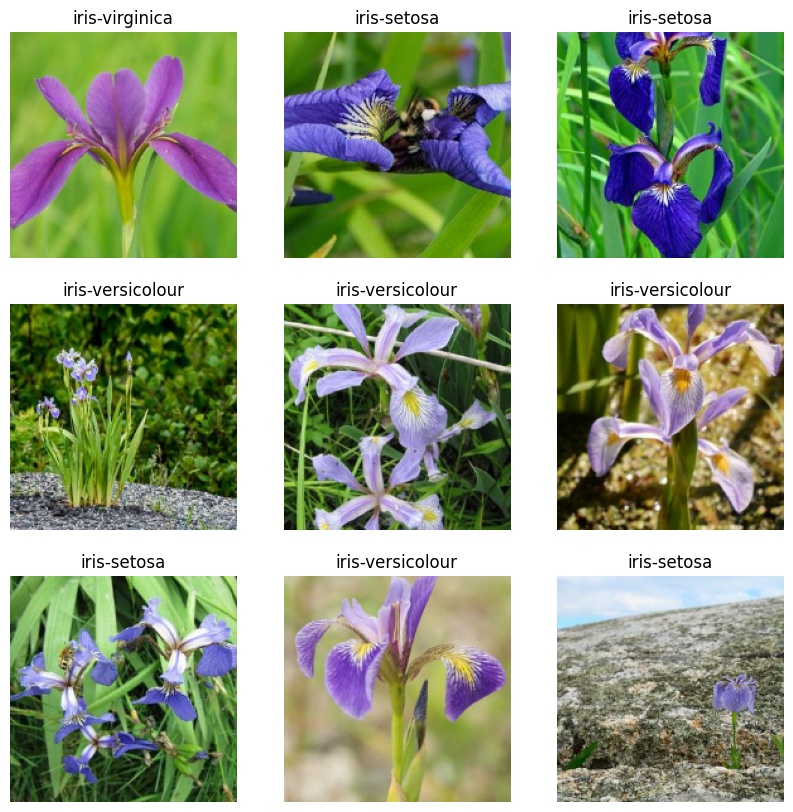

In [8]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [11]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

__DATA AUGMENTATION -__   a machine learning technique that artificially increases the size of a training set by making minor changes to existing data. These changes can include:
Spatial transformations: Rotation, flipping, scaling, and deformation
Appearance augmentation: Brightness and contrast
Image quality: Blurriness, sharpness, and noise level

In [12]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


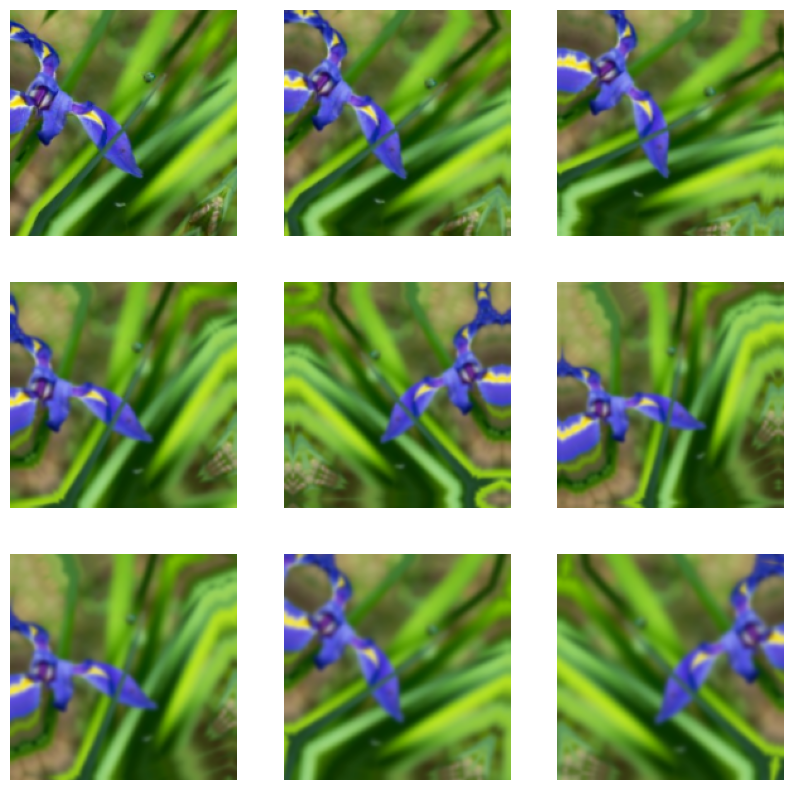

In [13]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

## NOW WE WILL CREATE OUR MODEL (MODEL CREATION)

In [14]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.3842 - loss: 1.5335 - val_accuracy: 0.6190 - val_loss: 1.0032
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 308ms/step - accuracy: 0.6242 - loss: 0.9728 - val_accuracy: 0.6190 - val_loss: 0.9410
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.6062 - loss: 0.9225 - val_accuracy: 0.6190 - val_loss: 0.9220
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - accuracy: 0.6408 - loss: 0.8901 - val_accuracy: 0.6190 - val_loss: 0.9439
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 0.6450 - loss: 0.8462 - val_accuracy: 0.6071 - val_loss: 0.9575
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.6239 - loss: 0.8611 - val_accuracy: 0.6190 - val_loss: 0.9719
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.6329 - loss: 0.8786 - val_accuracy: 0.6190 - val_loss: 0.9476
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.6323 - loss: 0.8984 - val_accuracy: 0.

In [18]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img('Test_Images/download (2).jfif', target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [19]:
classify_images('Test_Images/images (2).jfif')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


'The Image belongs to iris-versicolour with a score of 86.9722843170166'

In [20]:
# Save the model in the native Keras format
model.save('Iris_Classification.keras')